In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random as rnd
%matplotlib inline

In [2]:
train_df = pd.read_csv('/Users/kartikey/Desktop/ML/titanic/train.csv')
test_df = pd.read_csv('/Users/kartikey/Desktop/ML/titanic/test.csv')

In [3]:
full_data = [train_df, test_df]

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
for data in full_data: 
    data.drop(['Ticket', 'Cabin'], axis = 1, inplace = True)
train_df.drop('PassengerId', axis = 1, inplace = True)

In [6]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


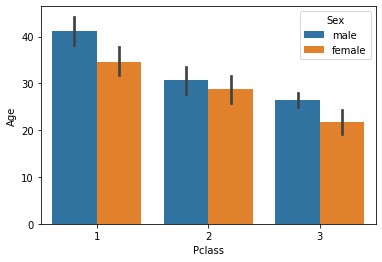

In [7]:
sns.barplot(x = train_df['Pclass'], y = train_df['Age'], data = train_df, hue = train_df['Sex'])

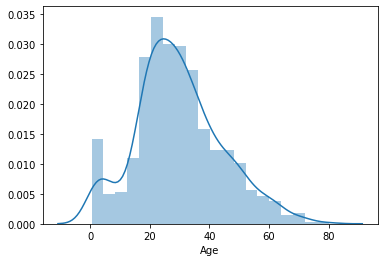

In [8]:
sns.distplot(train_df['Age'])

In [9]:
for data in full_data:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.')
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [10]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [11]:
train_df.drop('Name', axis = 1, inplace = True)

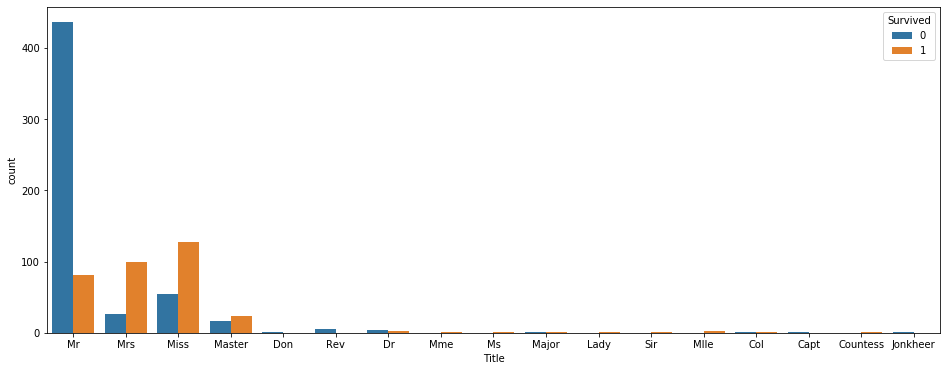

In [12]:
plt.figure(figsize = (16, 6))
sns.countplot(x = 'Title', hue = 'Survived', data = train_df)

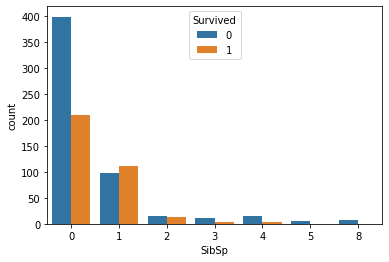

In [13]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = train_df)

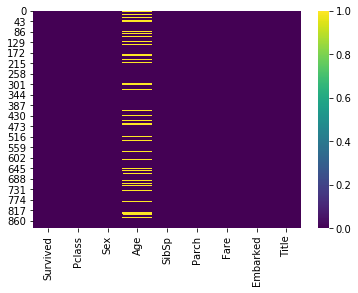

In [14]:
sns.heatmap(train_df.isnull(), cmap = 'viridis')

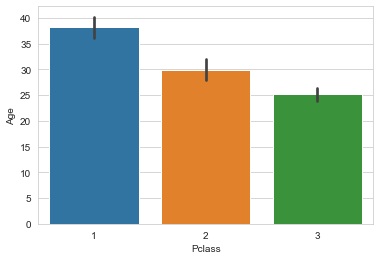

In [15]:
sns.set_style('whitegrid')
sns.barplot(x = train_df['Pclass'], y = train_df['Age'], data = train_df)

In [16]:
def set_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 43
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

for data in full_data:
    data['Age'] = data[['Age', 'Pclass']].apply(set_age, axis = 1)
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

train_df

In [17]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,25.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [18]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [20]:
for data in full_data:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(train_df['Title']).mean()
    

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [21]:
for data in full_data:
    data['Sex'] = data['Sex'].map({'male' : 0, 'female': 1}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,1,38.0,1,0,71.2833,C,Mrs
2,1,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,1,35.0,1,0,53.1000,S,Mrs
4,0,3,0,35.0,0,0,8.0500,S,Mr


In [22]:
train_df['Embarked'].isnull().sum()

2

In [23]:
for data in full_data:
    data['Embarked'].fillna('S', inplace = True)

In [24]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())

In [25]:
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], q = 4)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,CategoricalFare
0,0,3,0,22.0,1,0,7.2500,S,Mr,"(-0.001, 7.91]"
1,1,1,1,38.0,1,0,71.2833,C,Mrs,"(31.0, 512.329]"
2,1,3,1,26.0,0,0,7.9250,S,Miss,"(7.91, 14.454]"
3,1,1,1,35.0,1,0,53.1000,S,Mrs,"(31.0, 512.329]"
4,0,3,0,35.0,0,0,8.0500,S,Mr,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Rare,"(7.91, 14.454]"
887,1,1,1,19.0,0,0,30.0000,S,Miss,"(14.454, 31.0]"
888,0,3,1,25.0,1,2,23.4500,S,Miss,"(14.454, 31.0]"
889,1,1,0,26.0,0,0,30.0000,C,Mr,"(14.454, 31.0]"


In [26]:
train_df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index = False).mean()

,CategoricalFare,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [27]:
train_df['CategoricalAge'] = pd.cut(train_df['Age'], bins = 5)
train_df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index = False).mean()

,CategoricalAge,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [28]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,CategoricalFare,CategoricalAge
0,0,3,0,22.0,1,0,7.2500,S,Mr,"(-0.001, 7.91]","(16.336, 32.252]"
1,1,1,1,38.0,1,0,71.2833,C,Mrs,"(31.0, 512.329]","(32.252, 48.168]"
2,1,3,1,26.0,0,0,7.9250,S,Miss,"(7.91, 14.454]","(16.336, 32.252]"
3,1,1,1,35.0,1,0,53.1000,S,Mrs,"(31.0, 512.329]","(32.252, 48.168]"
4,0,3,0,35.0,0,0,8.0500,S,Mr,"(7.91, 14.454]","(32.252, 48.168]"
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Rare,"(7.91, 14.454]","(16.336, 32.252]"
887,1,1,1,19.0,0,0,30.0000,S,Miss,"(14.454, 31.0]","(16.336, 32.252]"
888,0,3,1,25.0,1,2,23.4500,S,Miss,"(14.454, 31.0]","(16.336, 32.252]"
889,1,1,0,26.0,0,0,30.0000,C,Mr,"(14.454, 31.0]","(16.336, 32.252]"


In [29]:
for dataset in full_data:
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
        
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
train_df = train_df.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

train_df.head(10)
print('_'*40)
test_df.head(10)

________________________________________


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2.0,0,0,0,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,1,0,0,S,3
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,1,Q,1
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,1,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,1,S,3
5,897,3,"Svensson, Mr. Johan Cervin",0,0.0,0,0,1,S,1
6,898,3,"Connolly, Miss. Kate",1,1.0,0,0,0,Q,2
7,899,2,"Caldwell, Mr. Albert Francis",0,1.0,1,1,2,S,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,1.0,0,0,0,C,3
9,901,3,"Davies, Mr. John Samuel",0,1.0,2,0,2,S,1


In [30]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0,S,1
1,1,1,1,2.0,1,0,3,C,3
2,1,3,1,1.0,0,0,1,S,2
3,1,1,1,2.0,1,0,3,S,3
4,0,3,0,2.0,0,0,1,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,1,S,5
887,1,1,1,1.0,0,0,2,S,2
888,0,3,1,1.0,1,2,2,S,2
889,1,1,0,1.0,0,0,2,C,1


In [31]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2.0,0,0,0,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,1,0,0,S,3
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,1,Q,1
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,1,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,1,S,3
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,1.0,0,0,1,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,2.0,0,0,3,C,5
415,1307,3,"Saether, Mr. Simon Sivertsen",0,2.0,0,0,0,S,1
416,1308,3,"Ware, Mr. Frederick",0,1.0,0,0,1,S,1


In [32]:
test_df.drop('Name', axis = 1, inplace = True)

In [33]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0,S,1
1,1,1,1,2.0,1,0,3,C,3
2,1,3,1,1.0,0,0,1,S,2
3,1,1,1,2.0,1,0,3,S,3
4,0,3,0,2.0,0,0,1,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,1,S,5
887,1,1,1,1.0,0,0,2,S,2
888,0,3,1,1.0,1,2,2,S,2
889,1,1,0,1.0,0,0,2,C,1


In [34]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2.0,0,0,0,Q,1
1,893,3,1,2.0,1,0,0,S,3
2,894,2,0,3.0,0,0,1,Q,1
3,895,3,0,1.0,0,0,1,S,1
4,896,3,1,1.0,1,1,1,S,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1.0,0,0,1,S,1
414,1306,1,1,2.0,0,0,3,C,5
415,1307,3,0,2.0,0,0,0,S,1
416,1308,3,0,1.0,0,0,1,S,1


In [35]:
for data in full_data:
    data['Age'] = data['Age'].astype('int')

In [36]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,0,Q,1
1,893,3,1,2,1,0,0,S,3
2,894,2,0,3,0,0,1,Q,1
3,895,3,0,1,0,0,1,S,1
4,896,3,1,1,1,1,1,S,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,1,S,1
414,1306,1,1,2,0,0,3,C,5
415,1307,3,0,2,0,0,0,S,1
416,1308,3,0,1,0,0,1,S,1


In [37]:
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [38]:
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [39]:
train = train_df.values
test = test_df.values

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [41]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ['Classifiers', 'Accuracy']
log = pd.DataFrame(columns = log_cols)

sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.1, random_state = 0)
X = train[0::, 1::]
y = train[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
acc_dict

{'KNeighborsClassifier': 8.1,
 'SVC': 8.277777777777777,
 'DecisionTreeClassifier': 8.044444444444443,
 'RandomForestClassifier': 8.188888888888886,
 'AdaBoostClassifier': 8.166666666666666,
 'GradientBoostingClassifier': 8.166666666666666,
 'GaussianNB': 7.999999999999999,
 'LinearDiscriminantAnalysis': 8.11111111111111,
 'QuadraticDiscriminantAnalysis': 8.188888888888888,
 'LogisticRegression': 8.11111111111111}

In [42]:
const = 0
for model in acc_dict:
    if acc_dict[model] > const:
        max_model = model  
        const = acc_dict[model]   
    else:
        pass

print('{} is the best classifier with {} score'.format(max_model, acc_dict[max_model]))

SVC is the best classifier with 8.277777777777777 score


# HYPERPARAMETER TUNING FOR SVC #

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [44]:
classifier = SVC()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, pred)

In [45]:

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear'] },
              {'C': [1, 10, 100, 1000], 'kernel': ['poly'] },
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           verbose = 1)
grid_search = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 44 candidates, totalling 220 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:   19.6s finished


In [46]:
grid_search.best_score_

0.8252484472049689

In [47]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [48]:
parameters_1 = [{'C': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'kernel': ['rbf'], 'gamma': [0.01, 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters_1,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           verbose = 10)
grid_search = grid_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0431s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0562s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1499s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    6.0s finished


In [49]:
grid_search.best_params_

{'C': 6, 'gamma': 0.12, 'kernel': 'rbf'}

In [60]:
final_classifier = SVC(C = 6, kernel = 'rbf', gamma = 0.12)
final_classifier.fit(train[0::, 1::], train[0::, 0])
result = final_classifier.predict(test_df.drop('PassengerId', axis = 1))
result

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [61]:
answer = pd.DataFrame(result, columns = ['Survived'])

In [68]:
test1 = pd.read_csv('/Users/kartikey/Desktop/ML/titanic/test.csv')
temp = pd.concat([test1['PassengerId'], answer] ,axis = 1)
temp['Survived'] = temp['Survived'].astype(int)

In [70]:
temp.to_csv('/Users/kartikey/Desktop/ML/titanic/Titanic_submission.csv', index = False)

In [64]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0,0,1
1,1,1,1,2.0,1,0,3,1,3
2,1,3,1,1.0,0,0,1,0,2
3,1,1,1,2.0,1,0,3,0,3
4,0,3,0,2.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,1,0,5
887,1,1,1,1.0,0,0,2,0,2
888,0,3,1,1.0,1,2,2,0,2
889,1,1,0,1.0,0,0,2,1,1
